In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from scipy.special import erfinv
from scipy.stats import skew, kurtosis

# Task1


# a) Vérification de la densité de probabilité f(E_ω)

La densité de probabilité est définie par :

$$
f(E_\omega) = \frac{A}{\sqrt{E_\omega}} e^{-\beta E_\omega}
$$

où :
- \( A \) est un facteur de normalisation,
- \( \beta = \frac{1}{k_B T} \) est une constante liée à la température (\( k_B \) étant la constante de Boltzmann et \( T \) la température en Kelvin).

---

 **Vérification de la positivité**

Les termes de \( f(E_\omega) \) sont :
1. \( \frac{1}{\sqrt{E_\omega}} > 0 \) pour \( E_\omega > 0 \),
2. \( e^{-\beta E_\omega} > 0 \) pour tout \( \beta > 0 \) et \( E_\omega \geq 0 \),
3. \( A > 0 \) lorsqu'il est défini correctement.

Ainsi, \( f(E_\omega) \geq 0 \) pour \( E_\omega > 0 \). La densité est donc positive.

---

 **Vérification de la normalisation**

Pour vérifier que \( f(E_\omega) \) est une densité de probabilité valide, nous devons montrer que :

$$
\int_0^{\infty} f(E_\omega) \, dE_\omega = 1
$$

Substituons \( f(E_\omega) \) :

$$
\int_0^{\infty} \frac{A}{\sqrt{E_\omega}} e^{-\beta E_\omega} \, dE_\omega = 1
$$

Simplifions :
- Le facteur \( A \) peut être sorti de l'intégrale.

$$
A \int_0^{\infty} \frac{1}{\sqrt{E_\omega}} e^{-\beta E_\omega} \, dE_\omega = 1
$$

Nous utilisons le changement de variable \( x = \beta E_\omega \), donc \( dE_\omega = \frac{dx}{\beta} \).

Les bornes restent inchangées, et l'intégrale devient :

$$
A \int_0^{\infty} \frac{\sqrt{\beta}}{\sqrt{x}} e^{-x} \frac{dx}{\beta} = 1
$$

Simplifions encore :

$$
A \cdot \frac{1}{\sqrt{\beta}} \int_0^{\infty} \frac{1}{\sqrt{x}} e^{-x} \, dx = 1
$$

L'intégrale \( \int_0^{\infty} x^{-1/2} e^{-x} \, dx = \sqrt{\pi} \) est une intégrale gamma (\( \Gamma(1/2) \)) :

$$
A \cdot \frac{\sqrt{\pi}}{\sqrt{\beta}} = 1
$$

En isolant \( A \), nous trouvons :

$$
A = \frac{\sqrt{\beta}}{\sqrt{\pi}}
$$

---

**Conclusion**

La densité de probabilité normalisée est donnée par :

$$
f(E_\omega) = \frac{\sqrt{\beta}}{\sqrt{\pi} \sqrt{E_\omega}} e^{-\beta E_\omega}
$$

Elle est :
1. Positive pour \( E_\omega > 0 \),
2. Normalisée avec \( \int_0^{\infty} f(E_\omega) \, dE_\omega = 1 \).


# b) Simulation Monte-Carlo

Dans cette section, nous utilisons la méthode Monte Carlo pour :
1. Générer des échantillons \( E_\omega \) en utilisant la méthode de l'inverse.
2. Comparer l'histogramme des échantillons avec la densité analytique \( f(E_\omega) \).


/var/folders/zg/qvcyxwwn4rj88hjjsbl3vds80000gn/T/ipykernel_2779/40396197.py:20: RuntimeWarning: divide by zero encountered in divide
  return A * np.exp(-beta * eps) / np.sqrt(eps)


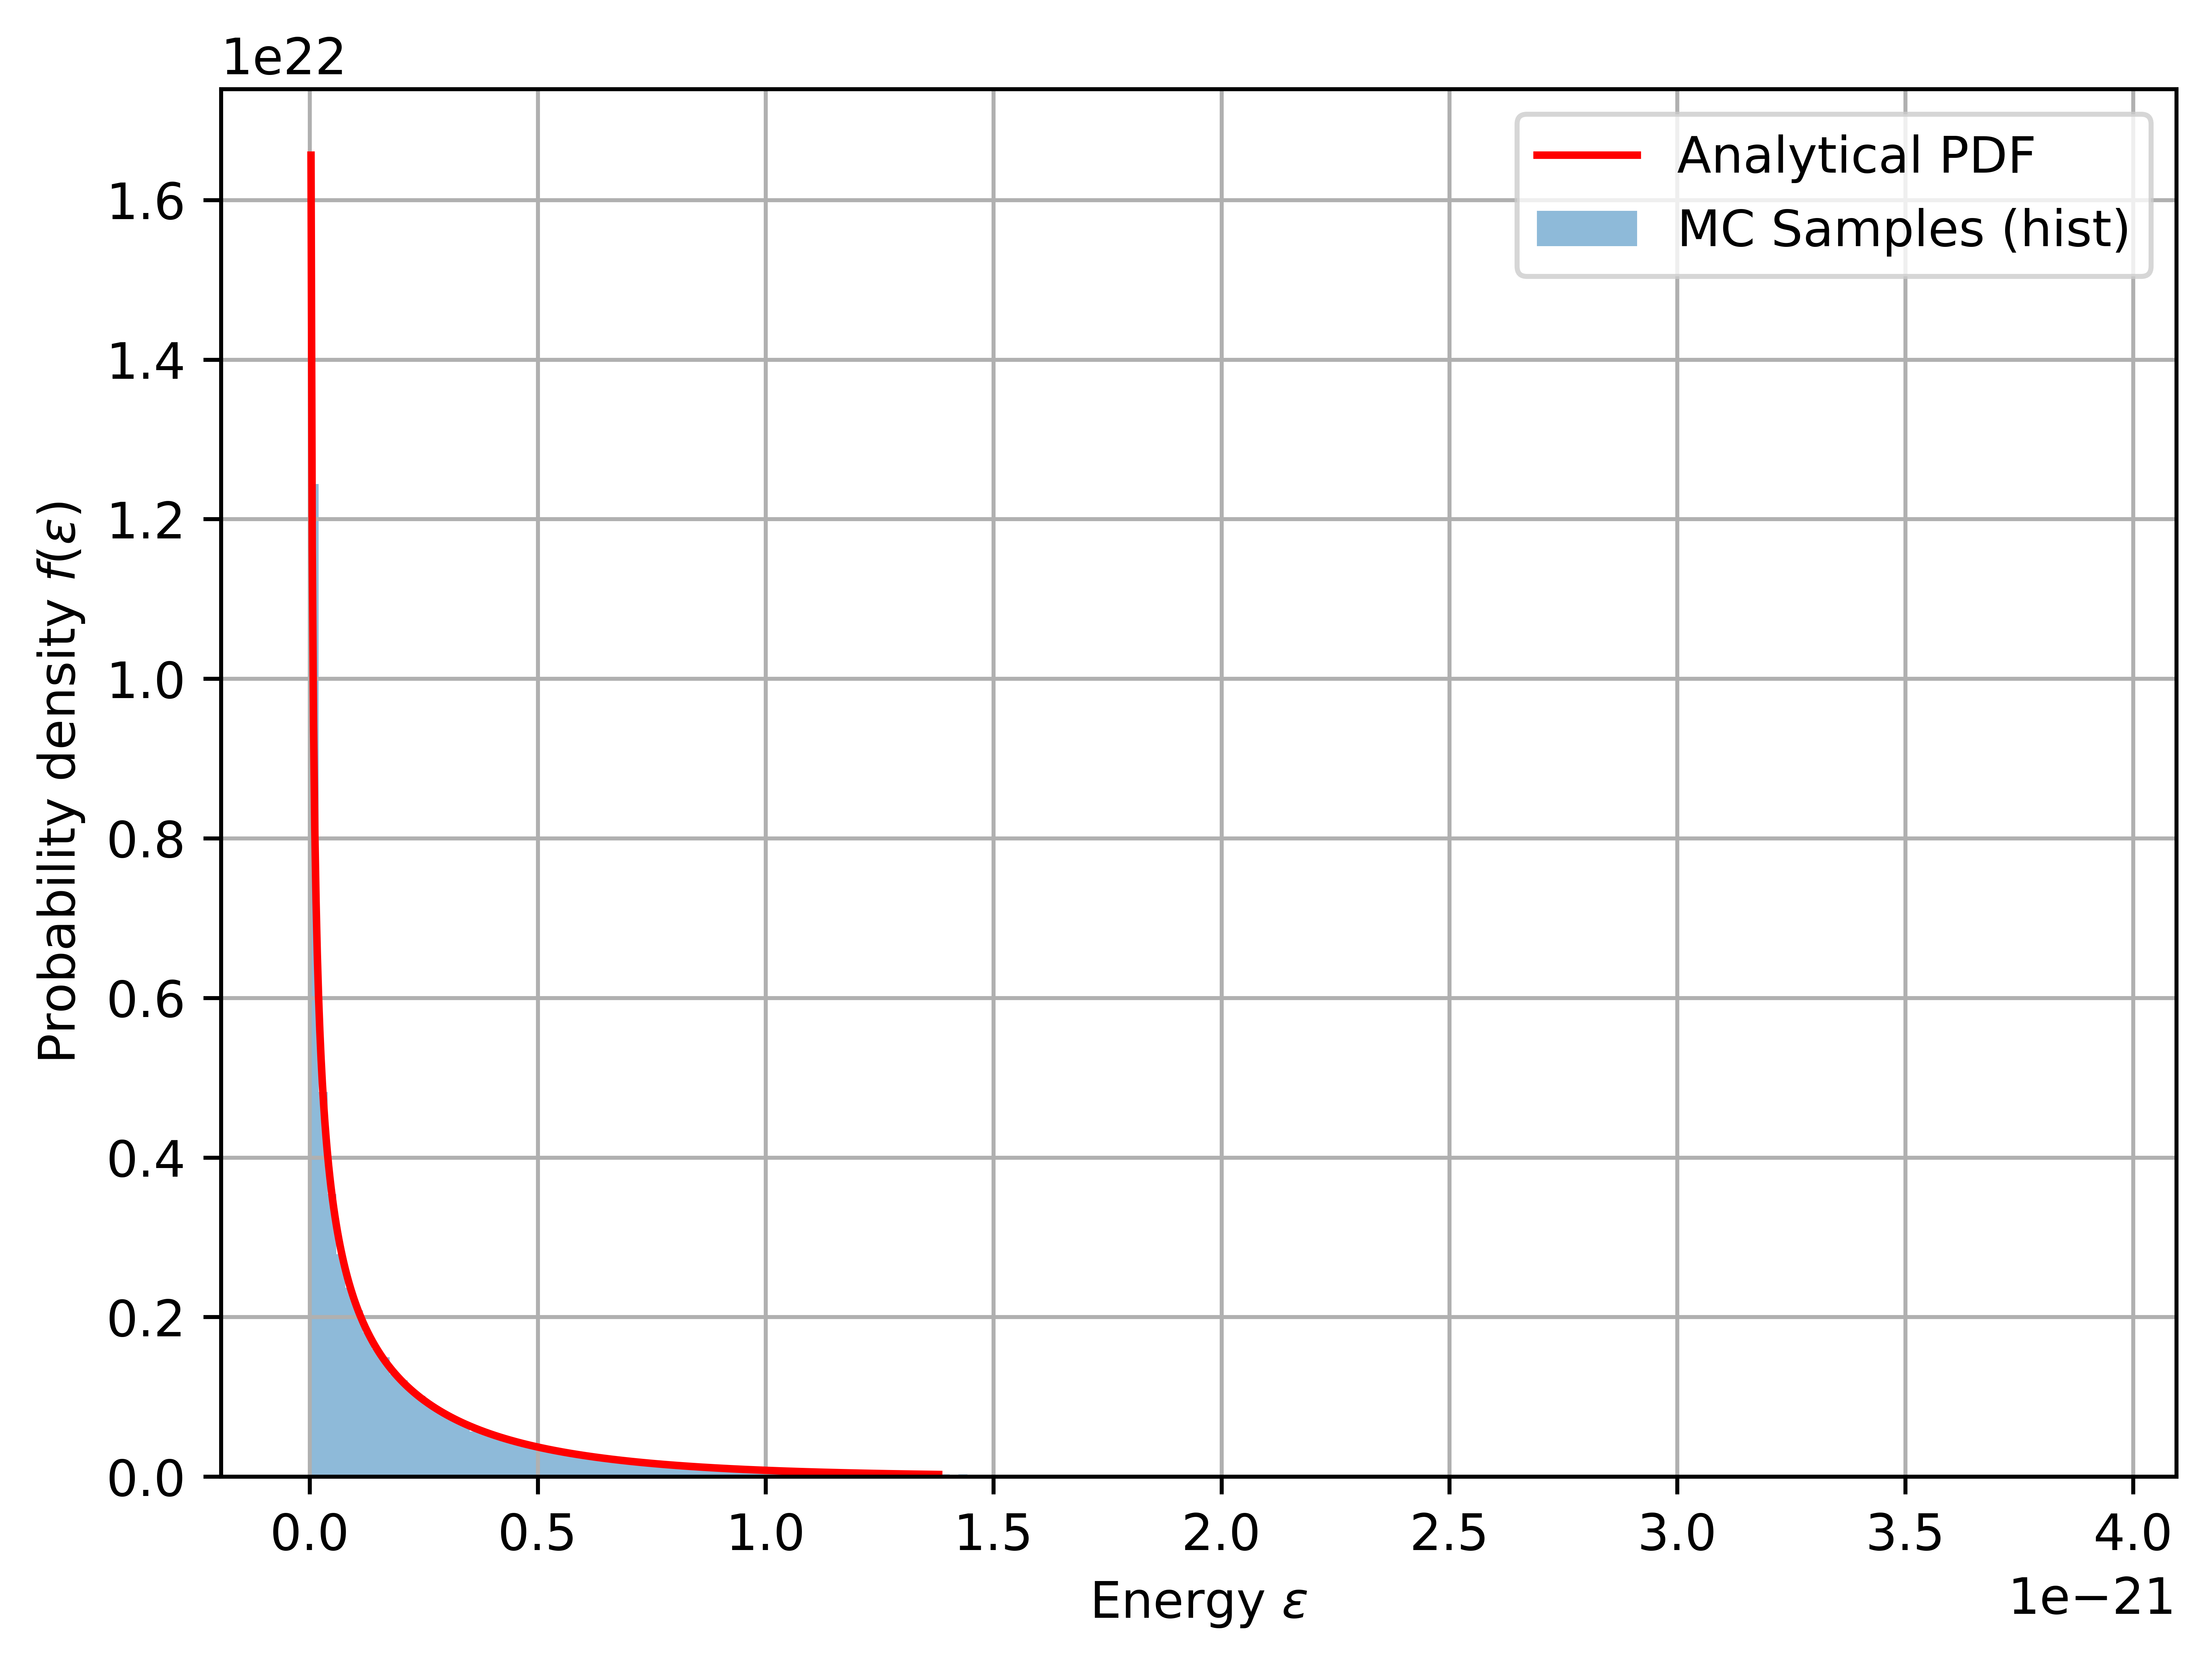

In [33]:
# Constantes physiques
m0 = 1.66e-27  # Masse atomique (kg)
K_40_mass = 40 * m0  # Masse de K-40 (kg)
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T = 30  # Température (K)
beta = 1 / (kb * T)  # Inverse de la température

A = np.sqrt(beta / math.pi)  # Facteur de normalisation

# Méthode de l'inverse pour générer des échantillons
def sample_energy_inverse_transform(N, beta):
    """Génère des échantillons via la méthode de l'inverse."""
    U = np.random.rand(N)
    return (erfinv(U) ** 2) / beta

# Densité de probabilité analytique
def pdf(eps, beta):
    """Densité de probabilité analytique."""
    A = np.sqrt(beta / math.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)


# Génération des échantillons
N = 100000  # Nombre d'échantillons
energy_samples = sample_energy_inverse_transform(N, beta)

# Histogramme
bins = 200
hist, bin_edges = np.histogram(energy_samples, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot de l'histogram
plt.figure(figsize=(7,5), dpi=1000)
plt.bar(bin_centers, hist, width=(bin_edges[1]-bin_edges[0]),alpha=0.5, label='MC Samples (hist)')


# Plot de la densité de manière analytique
eps_grid = np.linspace(0, np.percentile(energy_samples, 99.0), 500)
pdf_values = pdf(eps_grid, beta)
plt.plot(eps_grid, pdf_values, 'r-', label='Analytical PDF')




# Tracé
plt.xlabel(r'Energy $\varepsilon$')
plt.ylabel(r'Probability density $f(\varepsilon)$')
plt.legend()
plt.grid(True)
plt.show()


## c) Calcul de la moyenne d'échantillon et comparaison avec la valeur analytique

Dans cette section, nous calculons la moyenne des échantillons et la comparons à la valeur analytique :
\[
\langle E_\omega \rangle = \frac{1}{2} k_B T
\]


In [34]:
# c) Calcul de la moyenne et comparaison avec la valeur analytique

# Moyenne analytique
analytical_mean = 0.5 * kb * T

# Moyenne des échantillons
# sample_mean = np.mean(sample_energy_inverse_transform(N, beta))
sample_mean = np.mean(energy_samples)

# Résultats
print(f"Moyenne des échantillons (methode des rejet) : {sample_mean:.5e} J")
print(f"Moyenne analytique : {analytical_mean:.5e} J")
print(f"Erreur relative : {abs(sample_mean - analytical_mean) / analytical_mean:.5e}")


# Petite correction : au lieu de "sample_mean = np.mean(sample_energy_inverse_transform(N, beta))" ---> "sample_mean = np.mean(energy_samples)" 
# car avec l'ancienne ligne on utlisait à chaque fois la fonction pour regenerer une échantillon 
# aleatoire donc ca ne correspond pas a l'échantillon du dessus (est-ce réellement demandé ainsi ?) et rend le code un peu (à peine) plus lourd.



Moyenne des échantillons (methode des rejet) : 2.07247e-22 J
Moyenne analytique : 2.07090e-22 J
Erreur relative : 7.58485e-04


Échantillons générés après 474680 propositions.


/var/folders/zg/qvcyxwwn4rj88hjjsbl3vds80000gn/T/ipykernel_2779/3108837168.py:9: RuntimeWarning: divide by zero encountered in divide
  return A * np.exp(-beta * eps) / np.sqrt(eps)


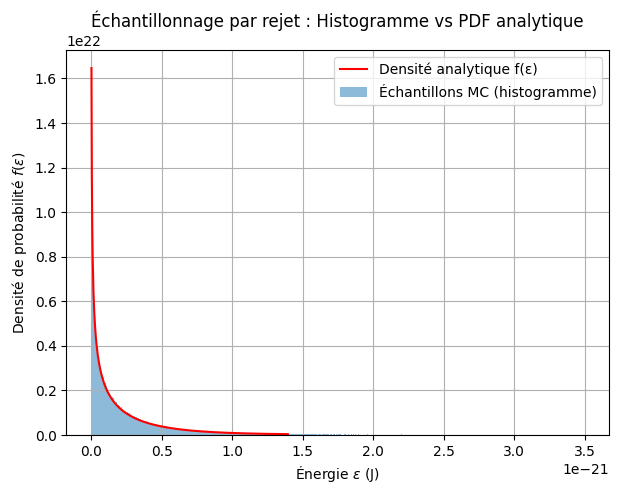

In [ ]:
# --- Définitions des fonctions ---
def target_pdf(eps, beta):
    """PDF cible f(ε) = sqrt(beta/pi) * exp(-beta ε) / sqrt(ε)."""
    A = np.sqrt(beta / math.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)

def proposal_pdf(eps, lam):
    """PDF de proposition g(ε) = λ exp(-λ ε)."""
    return lam * np.exp(-lam * eps)

def sample_from_proposal(lam, size):
    """Génère des échantillons à partir de la loi exponentielle g(ε)."""
    return np.random.exponential(1 / lam, size)

def rejection_sampling(N, beta, lam):
    """Échantillonnage par rejet avec la PDF cible f(ε) et la PDF de proposition g(ε)."""
    # --- Calcul sécurisé du facteur M ---
    eps_grid = np.linspace(1e-10, 10 / lam, 1000)  # Grille ajustée pour éviter 0
    target_vals = target_pdf(eps_grid, beta)
    proposal_vals = proposal_pdf(eps_grid, lam)
    
    # Remplace les valeurs nulles dans la PDF de proposition
    proposal_vals_safe = np.maximum(proposal_vals, 1e-10)

    # Ratio pour calculer M
    ratio = target_vals / proposal_vals_safe

    # Vérifie les ratios problématiques
    if np.any(np.isnan(ratio)) or np.any(np.isinf(ratio)):
        raise ValueError("Le ratio contient des valeurs NaN ou infinies.")

    # Calcul du facteur M
    M = 1.1 * np.max(ratio)
    #print(f"Nouveau facteur M : {M}")
    if np.isnan(M) or np.isinf(M):
        raise ValueError("Le facteur M est invalide.")
    
    # --- Échantillonnage par rejet ---
    samples = []
    total_proposals = 0
    while len(samples) < N:
        eps_proposed = sample_from_proposal(lam, 1)[0]
        total_proposals += 1
        
        # Probabilité d'acceptation
        accept_prob = target_pdf(eps_proposed, beta) / (M * proposal_pdf(eps_proposed, lam))
        if np.random.rand() < accept_prob:
            samples.append(eps_proposed)
        
        # Affichage de progression (désactivé avec commentaire)
        # if total_proposals % 10000 == 0:
        #     print(f"Propositions : {total_proposals}, Acceptés : {len(samples)}, Taux : {len(samples) / total_proposals:.2%}")
    
    print(f"Échantillons générés après {total_proposals} propositions.")
    return np.array(samples)

# --- Paramètres physiques ---
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T = 30  # Température (K)
beta = 1 / (kb * T)  # Inverse de la température
lam = beta * 1.5  # Réduction pour éviter un facteur M infini
N = 100000  # Nombre d'échantillons Monte Carlo

# Génère les échantillons via la méthode de rejet
samples = rejection_sampling(N, beta, lam)

# --- Tracé des résultats ---
# Histogramme des échantillons
bins = 500
hist, bin_edges = np.histogram(samples, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# PDF analytique
eps_grid = np.linspace(0, np.percentile(samples, 99.0), 500)
pdf_values = target_pdf(eps_grid, beta)

# Tracé
plt.figure(figsize=(7, 5))
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.5, label="Échantillons MC (histogramme)")
plt.plot(eps_grid, pdf_values, 'r-', label="Densité analytique f(ε)")
plt.xlabel(r"Énergie $\varepsilon$ (J)")
plt.ylabel(r"Densité de probabilité $f(\varepsilon)$")
plt.title("Échantillonnage par rejet : Histogramme vs PDF analytique")
plt.legend()
plt.grid(True)
plt.show()


In [36]:
# --- Calcul de la moyenne avec l'échantillonnage par rejet ---
# Moyenne des échantillons obtenus par rejet
rejection_mean = np.mean(samples)

# Moyenne analytique (calculée dans la c))
analytical_mean = 0.5 * kb * T  # Déjà définie

# Moyenne de la méthode précédente (à récupérer de la c))
#previous_mean = 2.07090e-22  # Remplacez par la valeur de la c) si nécessaire
previous_mean = sample_mean

# Comparaison des résultats
print(f"Moyenne des échantillons (méthode de Neumann (rejet)) : {rejection_mean:.5e} J")
print(f"Moyenne précédente des échantillons (methode des inverse) : {previous_mean:.5e} J")
print(f"Moyenne analytique : {analytical_mean:.5e} J")

# Erreurs relatives
error_rejection_analytical = abs(rejection_mean - analytical_mean) / analytical_mean
error_previous_analytical = abs(previous_mean - analytical_mean) / analytical_mean


print(f"Erreur relative (Neumann vs analytique) : {error_rejection_analytical:.3%}")
print(f"Erreur relative (Inverse vs analytique) : {error_previous_analytical:.3%}")


# Discussion sur l'efficacité
print("\n--- Discussion sur l'efficacité ---")
print("La méthode par rejet peut avoir un temps de calcul plus long si le facteur M est élevé.")
print("Comparez le temps total de calcul et les taux de convergence pour évaluer l'efficacité réelle.")





Moyenne des échantillons (méthode de Neumann (rejet)) : 2.17080e-22 J
Moyenne précédente des échantillons (methode des inverse) : 2.07247e-22 J
Moyenne analytique : 2.07090e-22 J
Erreur relative (Neumann vs analytique) : 4.824%
Erreur relative (Inverse vs analytique) : 0.076%

--- Discussion sur l'efficacité ---
La méthode par rejet peut avoir un temps de calcul plus long si le facteur M est élevé.
Comparez le temps total de calcul et les taux de convergence pour évaluer l'efficacité réelle.


## e) 

Compute the variance, skewness and kurtosis of the distribution and comment.

In [37]:
N = 1000000
beta = 1/(kb*T)
lam = beta

def compute_statistics(samples):
    """Compute mean, variance, skewness, and kurtosis of the energy samples."""
    mean = np.mean(samples)  
    variance = np.var(samples)
    skewness = skew(samples)  
    kurt = kurtosis(samples, fisher=False)  
    
    return mean, variance, skewness, kurt

mean_Inverse, variance_Inverse, skewness_Inverse, kurt_Inverse = compute_statistics(sample_energy_inverse_transform(N, beta))

mean_Neumann, variance_Neumann, skewness_Neumann, kurt_Neumann = compute_statistics(rejection_sampling(N, beta, lam))



print(f"Mean (⟨E⟩): {mean_Inverse:.5e} J")
print(f"Variance: {variance_Inverse:.5e} J^2")
print(f"Skewness: {skewness_Inverse:.5f}")
print(f"Kurtosis: {kurt_Inverse:.5f}\n\n")


print(f"Mean (⟨E⟩): {mean_Neumann:.5e} J")
print(f"Variance: {variance_Neumann:.5e} J^2")
print(f"Skewness: {skewness_Neumann:.5f}")
print(f"Kurtosis: {kurt_Neumann:.5f}")

Échantillons générés après 1000016 propositions.
Mean (⟨E⟩): 2.06824e-22 J
Variance: 8.55536e-44 J^2
Skewness: 2.81632
Kurtosis: 14.76424


Mean (⟨E⟩): 4.14101e-22 J
Variance: 1.71454e-43 J^2
Skewness: 1.98561
Kurtosis: 8.80804


 ## Task 2: Convergence


In [38]:
#@author: aidanmcgregor

# --- import des bibliothèques nécessaires ---
#fait, c.f. en haut

# --- Paramètres globaux ---
m0 = 1.66e-27  # Masse atomique (kg)
K_40_mass = 40 * m0  # Masse atomique du potassium-40
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T = 30  # Température (K)

beta = 1 / (kb * T)  # Inverse de la température

# --- Définition des fonctions nécessaires ---
def target_pdf(eps, beta):
    """PDF cible f(ε)."""
    A = np.sqrt(beta / math.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)

def rejection_sampling(N, beta):
    """Échantillonnage par rejet pour f(ε)."""
    lam = beta  # Choix de λ = β
    M = np.sqrt(np.pi / beta)  # Facteur d'échelle

    samples = []
    upper_bound = 2e-21
    while len(samples) < N:
        eps_proposed = np.random.gamma(0.5, 1 / lam)
        if eps_proposed < upper_bound:
            accept_prob = target_pdf(eps_proposed, beta) / (M * lam * np.exp(-lam * eps_proposed) / np.sqrt(eps_proposed))
            if np.random.rand() < accept_prob:
                samples.append(eps_proposed)
    return np.array(samples)

def compute_statistics(samples):
    """Calcule la moyenne, la variance, l'asymétrie et le kurtosis."""
    mean = np.mean(samples)
    variance = np.var(samples)
    skewness = skew(samples)
    kurt = kurtosis(samples, fisher=False)
    return mean, variance, skewness, kurt


a) Take Nexp = 1 and show the law of large numbers based on the data points you generated.

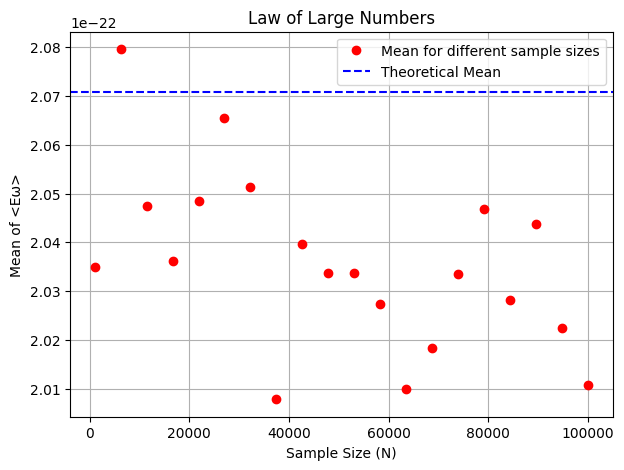

In [39]:
 #Montrer la loi des grands nombres avec N_exp = 1

LLN_x = np.linspace(1000, 100000, 20)
LLN_y = [np.mean(rejection_sampling(int(n), beta)) for n in LLN_x]

plt.figure(figsize=(7, 5))
plt.plot(LLN_x, LLN_y, 'ro', label='Mean for different sample sizes')
plt.axhline(y=2.07090e-22, color='b', linestyle='--', label='Theoretical Mean')
plt.xlabel("Sample Size (N)")
plt.ylabel("Mean of <Eω>")
plt.title("Law of Large Numbers")
plt.legend()
plt.grid(True)
plt.show()

b) Take N_exp >> 1 and show the validity of the central limit theorem for <E_ω>.

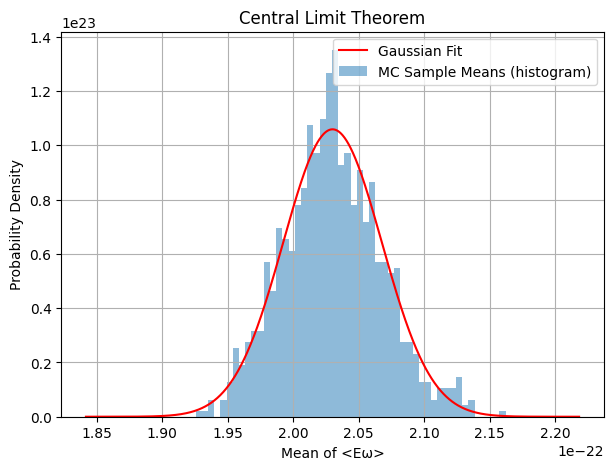

In [40]:
# Montrer la validité du théorème central limite avec N_exp ≫ 1

N_exp = 1000
sample_size = 5000
CLT_means = [np.mean(rejection_sampling(sample_size, beta)) for _ in range(N_exp)]

# Histogramme des moyennes
hist, bin_edges = np.histogram(CLT_means, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

plt.figure(figsize=(7, 5))
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.5, label='MC Sample Means (histogram)')

# Comparaison avec une courbe gaussienne
CLT_mean = np.mean(CLT_means)
CLT_var = np.var(CLT_means)
CLT_x = np.linspace(CLT_mean - 5 * np.sqrt(CLT_var), CLT_mean + 5 * np.sqrt(CLT_var), 1000)
CLT_y = 1 / np.sqrt(2 * np.pi * CLT_var) * np.exp(-((CLT_x - CLT_mean) ** 2) / (2 * CLT_var))

plt.plot(CLT_x, CLT_y, 'r-', label='Gaussian Fit')
plt.xlabel("Mean of <Eω>")
plt.ylabel("Probability Density")
plt.title("Central Limit Theorem")
plt.legend()
plt.grid(True)
plt.show()

c) Compute the variance of <E_ω> and compare it with the value you expect.

In [41]:
# Calculer la variance de <Eω> et la comparer avec la valeur théorique


expected_variance = 2.3894658371069e-45  # Théorique: σ^2/N
empirical_variance = np.var(CLT_means)

print(f"The variance of <Eω> (empirical): {empirical_variance:.5e}")
print(f"The expected variance of <Eω>: {expected_variance:.5e}")


The variance of <Eω> (empirical): 1.41975e-47
The expected variance of <Eω>: 2.38947e-45


## Task3

a) What is the expected p.d.f. for the number of entries per bin?

b) Show that the Χ^2 of the obtained entries per bin follows a Χ^2 distribution. Instead of calculating the empirical mean value per bin from the experiments, use the nominal value from the p.d.f. formula per bin as the mean value per bin.

c) How does the Χ^2 distribution change with the number of bins?

## Task4

a) Compute the log likelihood ln L(E!,1, E!,2, ..., E!,N | T ) at a given T . Then, use the maximum likelihood method to estimate T and its variance.